# Base Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE

# 1. Explore Base Dataset

1. **信用风险评分（credit_risk_score）**：
   - **理由**：信用风险评分是银行用来评估申请人信用风险的重要指标，直接反映了申请人的信用情况，这与欺诈行为有很大关联。

2. **收入（income）**：
   - **理由**：收入水平可以帮助识别申请人的经济状况，高收入可能意味着较低的欺诈风险，而异常高或异常低的收入可能提示潜在的欺诈风险。

3. **姓名邮箱相似度（name_email_similarity）**：
   - **理由**：名字和邮箱的相似度可以揭示申请人提供的信息是否一致，低相似度可能提示使用假信息进行欺诈。

4. **申请日期（days_since_request）**：
   - **理由**：申请日期可以揭示短时间内大量申请的情况，这可能是欺诈行为的一个重要指标。

5. **邮政编码4周内计数（zip_count_4w）**：
   - **理由**：同一邮政编码内短时间内大量申请可能提示某个地区的集中欺诈行为。

6. **设备欺诈计数（device_fraud_count）**：
   - **理由**：使用同一设备的欺诈申请数量是一个直接的欺诈指示器，历史上的欺诈记录是预测未来欺诈的强指标。

7. **电话有效性（phone_home_valid, phone_mobile_valid）**：
   - **理由**：电话的有效性可以帮助识别申请人的真实性，虚假或无效的电话号码可能提示欺诈行为。

8. **预期余额金额（intended_balcon_amount）**：
   - **理由**：预期余额金额的异常值可能提示欺诈行为，例如非常高的初始转账金额。

9. **住房状态（housing_status）**：
   - **理由**：住房状态反映了申请人的稳定性，较稳定的住房状态可能意味着较低的欺诈风险。


In [2]:
base = pd.read_csv('datasets/Base.csv') #Base_cleaned.csv是将device_fraud_count列（全部为0）删除后的数据集
base


# 由于原数据income=0.6或0.7并不精确，实际上有小数点后数位的偏移，需要截取到一位小数
# # 截取到一位小数
# base['income'] = base['income'].apply(lambda x: round(x, 1))
# 
# # 查看截取后的唯一值
# unique_incomes = base['income'].unique()
# print(unique_incomes)

# base.to_csv('datasets/Base_cleaned.csv', index=False)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [108]:
base.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000,1000000.000000,1000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,INTERNET,NaN,other,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370554,NaN,...,NaN,NaN,NaN,992952,NaN,342728,NaN,NaN,NaN,NaN
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,NaN,1572.692049,...,0.222988,515.851010,0.025242,NaN,7.544940,NaN,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,NaN,1005.374565,...,0.416251,487.559902,0.156859,NaN,8.033106,NaN,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,NaN,1.000000,...,0.000000,190.000000,0.000000,NaN,-1.000000,NaN,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,NaN,894.000000,...,0.000000,200.000000,0.000000,NaN,3.103053,NaN,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,NaN,1263.000000,...,0.000000,200.000000,0.000000,NaN,5.114321,NaN,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,NaN,1944.000000,...,0.000000,500.000000,0.000000,NaN,8.866131,NaN,1.000000,1.000000,0.0,5.000000


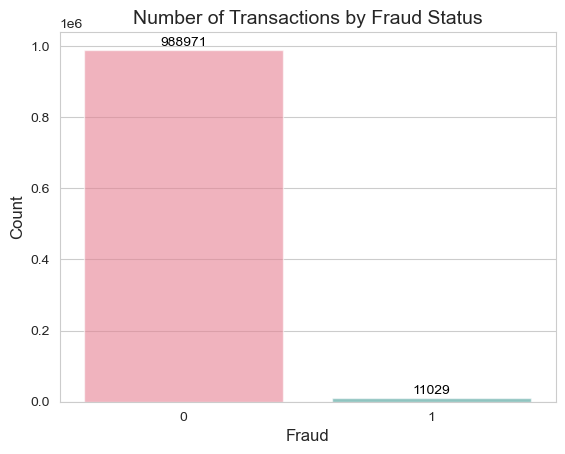

In [109]:
# Define custom color palette
my_palette = sns.color_palette("husl", 2)

sns.set_style("whitegrid")

# Plot the fraud_bool distribution
ax = sns.countplot(data=base, x="fraud_bool", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Number of Transactions by Fraud Status", fontsize=14)

# Add data labels
for p in ax.patches:
    height = int(p.get_height())  # Convert to integer
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display plot
plt.show()

## 1.1 Missing values
Missing values are represented by -1 or negative values in the dataset. Let's replace them with NaN values.

As the description says, there are only 6 numeric columns with missing values:

1. **prev_address_months_count**: -1 indicates a missing value.
2. **Current Address Months Count (numeric value) current_address_months_count**: -1 indicates a missing value.
3. **Expected Balance Amount (numeric value) introduced_balcon_amount**: a negative value indicates a missing value.
4. **Session length (numeric value) session_length_in_minutes**: -1 indicates a missing value.
5. **Bank account months (numeric value) bank_months_count**: -1 indicates a missing value.
6. **device_unique_emails_count (numeric value) device_distinct_emails**: -1 indicates a missing value.


In [3]:
# check for missing values（-1 or negative values）

df=base.copy()

# select the columns with missing values
missing_cols = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 'session_length_in_minutes', 'bank_months_count', 'device_distinct_emails_8w']
# replace -1 or negative values with NaN
df[missing_cols] = df[missing_cols].replace(-1, np.nan)
df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)

C:\Users\yhb\AppData\Local\Temp\ipykernel_34720\3637865308.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[missing_cols] = df[missing_cols].applymap(lambda x: np.nan if x < 0 else x)


In [4]:
df.isnull().sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount              742523
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                        0
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [5]:
# 创建存放缺失值百分比的 DataFrame
missing_vals = pd.DataFrame()

# 计算每个特征在不同欺诈状态下的缺失值百分比
for feature in missing_cols:
    missing_vals_col = df.groupby('fraud_bool')[feature].apply(lambda x: round(x.isna().sum() / len(x) * 100, 2))
    missing_vals[feature] = missing_vals_col

# 转置并重塑数据框架以适合绘图
missing_vals = pd.DataFrame(missing_vals.T.stack()).reset_index()
missing_vals.columns = ['feature', 'fraud_bool', 'missing_vals']

# 将 fraud_bool 列转换为字符串类型
missing_vals['fraud_bool'] = missing_vals['fraud_bool'].astype(str)

# 设置绘图
plt.figure(figsize=(12, 7))

# 创建柱状图
ax = sns.barplot(data=missing_vals, x="feature", y="missing_vals", hue="fraud_bool", palette=my_palette, alpha=.6)

# 在每个柱状图上添加数值标注
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., height + 0.5,
        f'{height:.2f}%', ha='center', va='bottom', fontsize=10, color='black'
    )

# 自定义标签和图例
ax.set_xlabel("Feature", fontsize=12)
ax.set_ylabel("Missing Values (%)", fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_title("Missing Values of Features by Fraud Status", fontsize=14)
ax.legend(title="Fraud", fontsize=10)

# 显示图表
plt.show()

NameError: name 'my_palette' is not defined

<Figure size 1200x700 with 0 Axes>

## 1.2 Deal with Missing Values
- As the missing values in col[prev_address_months_count] and col[intended_balcon_amount] are too many, we can drop the 2 cols.
- For the [bank_months_count], about 25% of the values are missing, we can fill the missing values.
    - 选择使用该列最多的情况（1）进行填充，这样处理可以保持数据的一致性，并避免引入过多的偏差。
- For the rest of the cols(3 cols), the missing values are less than 1%, we can drop the rows with missing values.

In [6]:
# drop the columns with too many missing values
df.drop(columns=['prev_address_months_count', 'intended_balcon_amount'], inplace=True)

# fill the missing values in bank_months_count with the median value
df['bank_months_count'].fillna(1, inplace=True)

# drop the rows with missing values
df.dropna(inplace=True)
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os                           0
keep_alive_s

## 1.3 Numeric Features 
一共三种特征：数值型，二进制，类别型

类别型有5个变量：付款类型（分类）payment_type，就业状态（分类）employment_status，住房状态（分类）housing_status，来源（分类）source，设备操作系统（分类）device_os

二进制7个：binary_features = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

数值型13个(unique>=10）,有两个缺失值过多，之后建模的时候可以考虑删除。

'customer_age', 'device_distinct_emails_8w', 'income', 'month'数据类型为numeric但是unique<10，可以认为是一种类别型特征。但是并未归类到cate_features中。

In [7]:
# 筛选出二进制特征
binary_features_name = [
    'email_is_free',
    'phone_home_valid',
    'phone_mobile_valid',
    'has_other_cards',
    'foreign_request',
    'keep_alive_session',
    'fraud_bool'
]

binary_features = df[binary_features_name]

# 列出所有的数值型特征
# numeric_features_name = df.select_dtypes(include=['number']).columns.tolist()
# 去掉二进制特征
# numeric_features_name = [col for col in numeric_features_name if col not in binary_features_name]

numeric_features_name=[x for x in df.columns if df[x].nunique() >= 10]

numeric_features = df[numeric_features_name]

# 筛选出类别型特征
cate_features_name = df.select_dtypes(include=['object']).columns.tolist()
cate_features = df[cate_features_name]

### 1.3.1 Distribution
所有数值型密度分布（分别标注欺诈和非欺诈）
此时使用原始base数据（未经过缺失值处理）

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

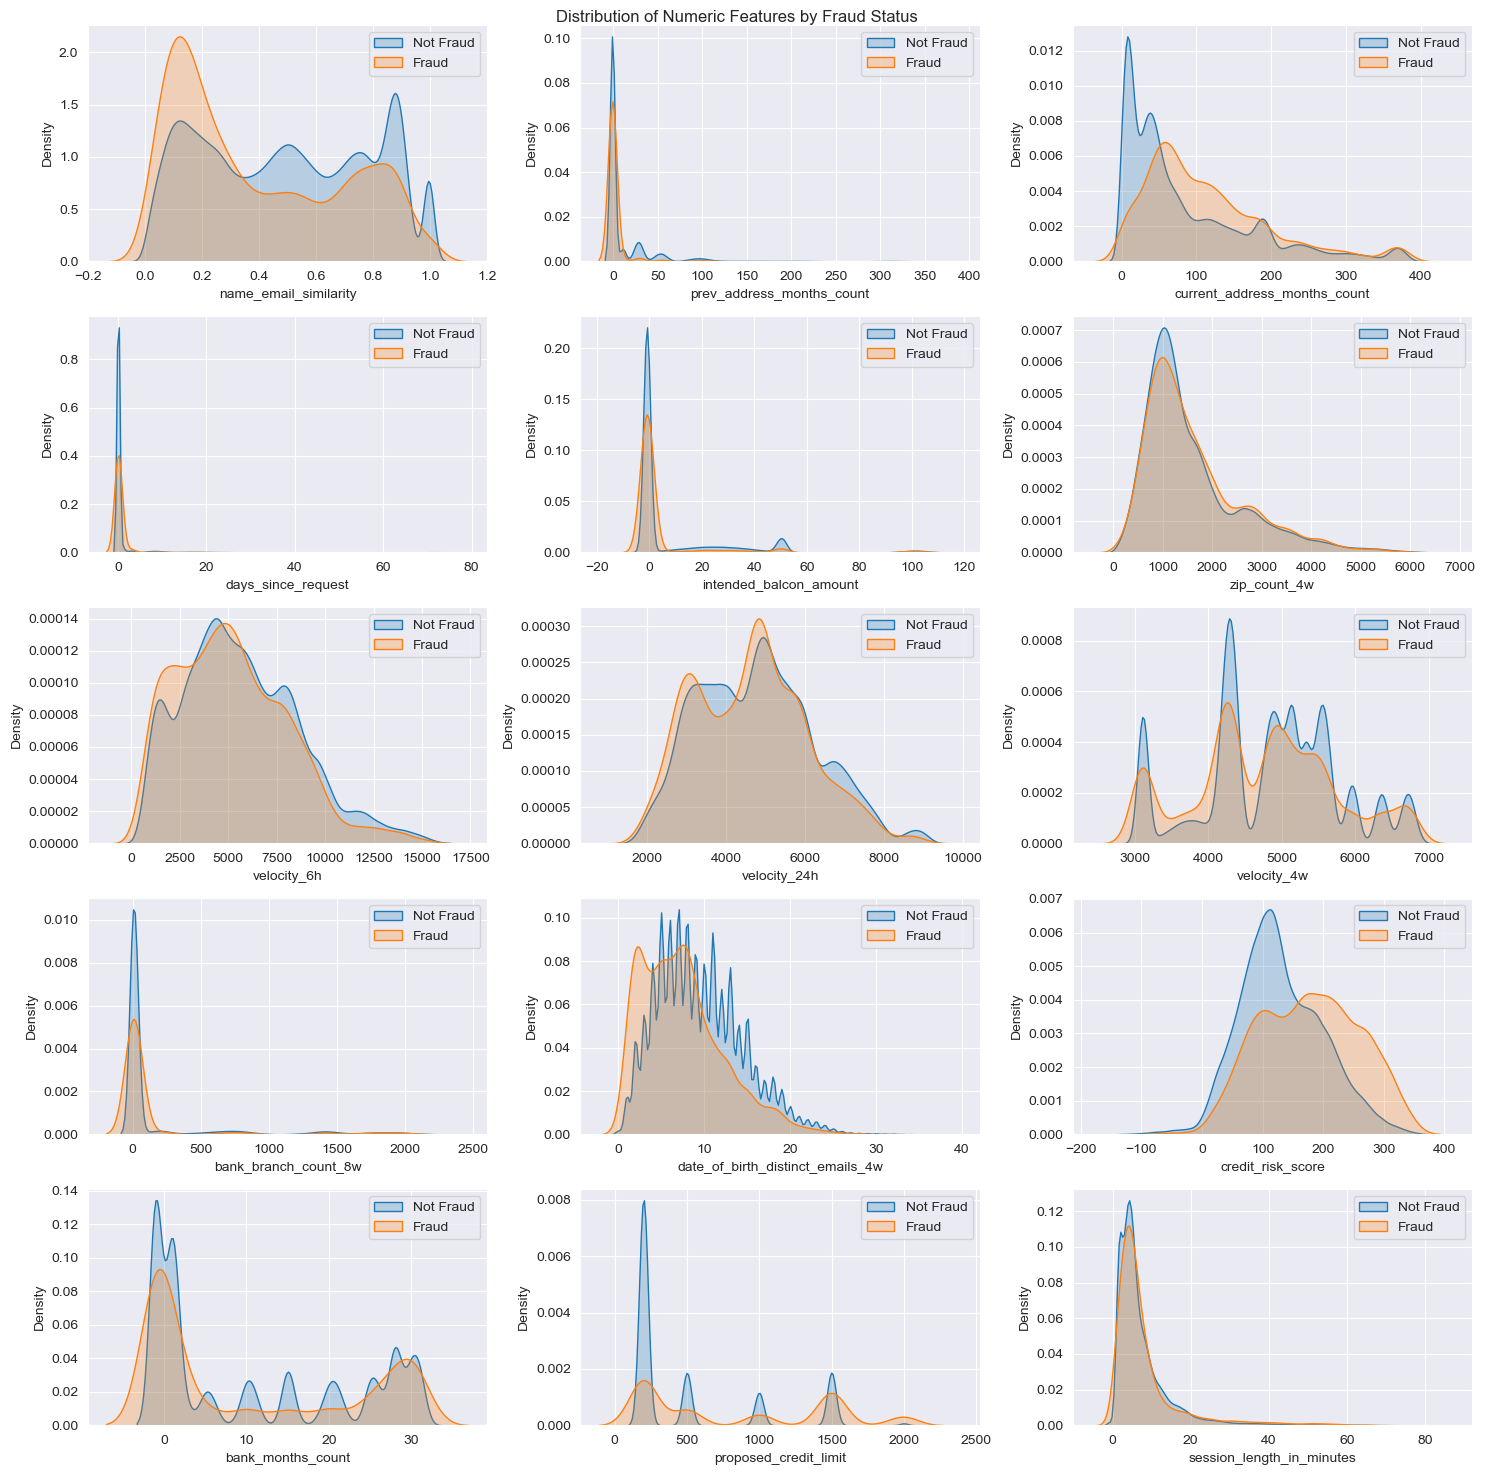

In [179]:
numeric_features_name=[x for x in base.columns if base[x].nunique() >= 10]


fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Distribution of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a kernel density plot for each feature
for i, feature in enumerate(numeric_features_name):
    ax = axes[i // 3][i % 3]
    sns.kdeplot(data=base[base['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=base[base['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### 1.3.2 Outliers
在不平衡数据中进行异常值处理可能会带来一些挑战，比如异常值可能包含有价值的信息或代表了少数类别的罕见实例，若直接剔除异常值容易导致信息丢失，类分别失真，偏离真实世界数据分布等问题。考虑对模型性能的潜在影响，暂时不对该数据集的异常值进行处理。未来可以尝试探索能保持不平衡数据完整性的替代方法，例如专为不平衡数据集设计的稳健建模技术或异常值检测方法。

Outlier processing in unbalanced data may pose some challenges, such as outliers may contain valuable information or represent rare instances of a few classes, which if directly eliminated can easily lead to problems such as loss of information, distortion of class separation, and deviation from real-world data distribution. Considering the potential impact on model performance, the outliers in this dataset are not processed for the time being. In the future, attempts can be made to explore alternative methods that can maintain the integrity of unbalanced data, such as robust modelling techniques designed for unbalanced datasets or outlier detection methods.


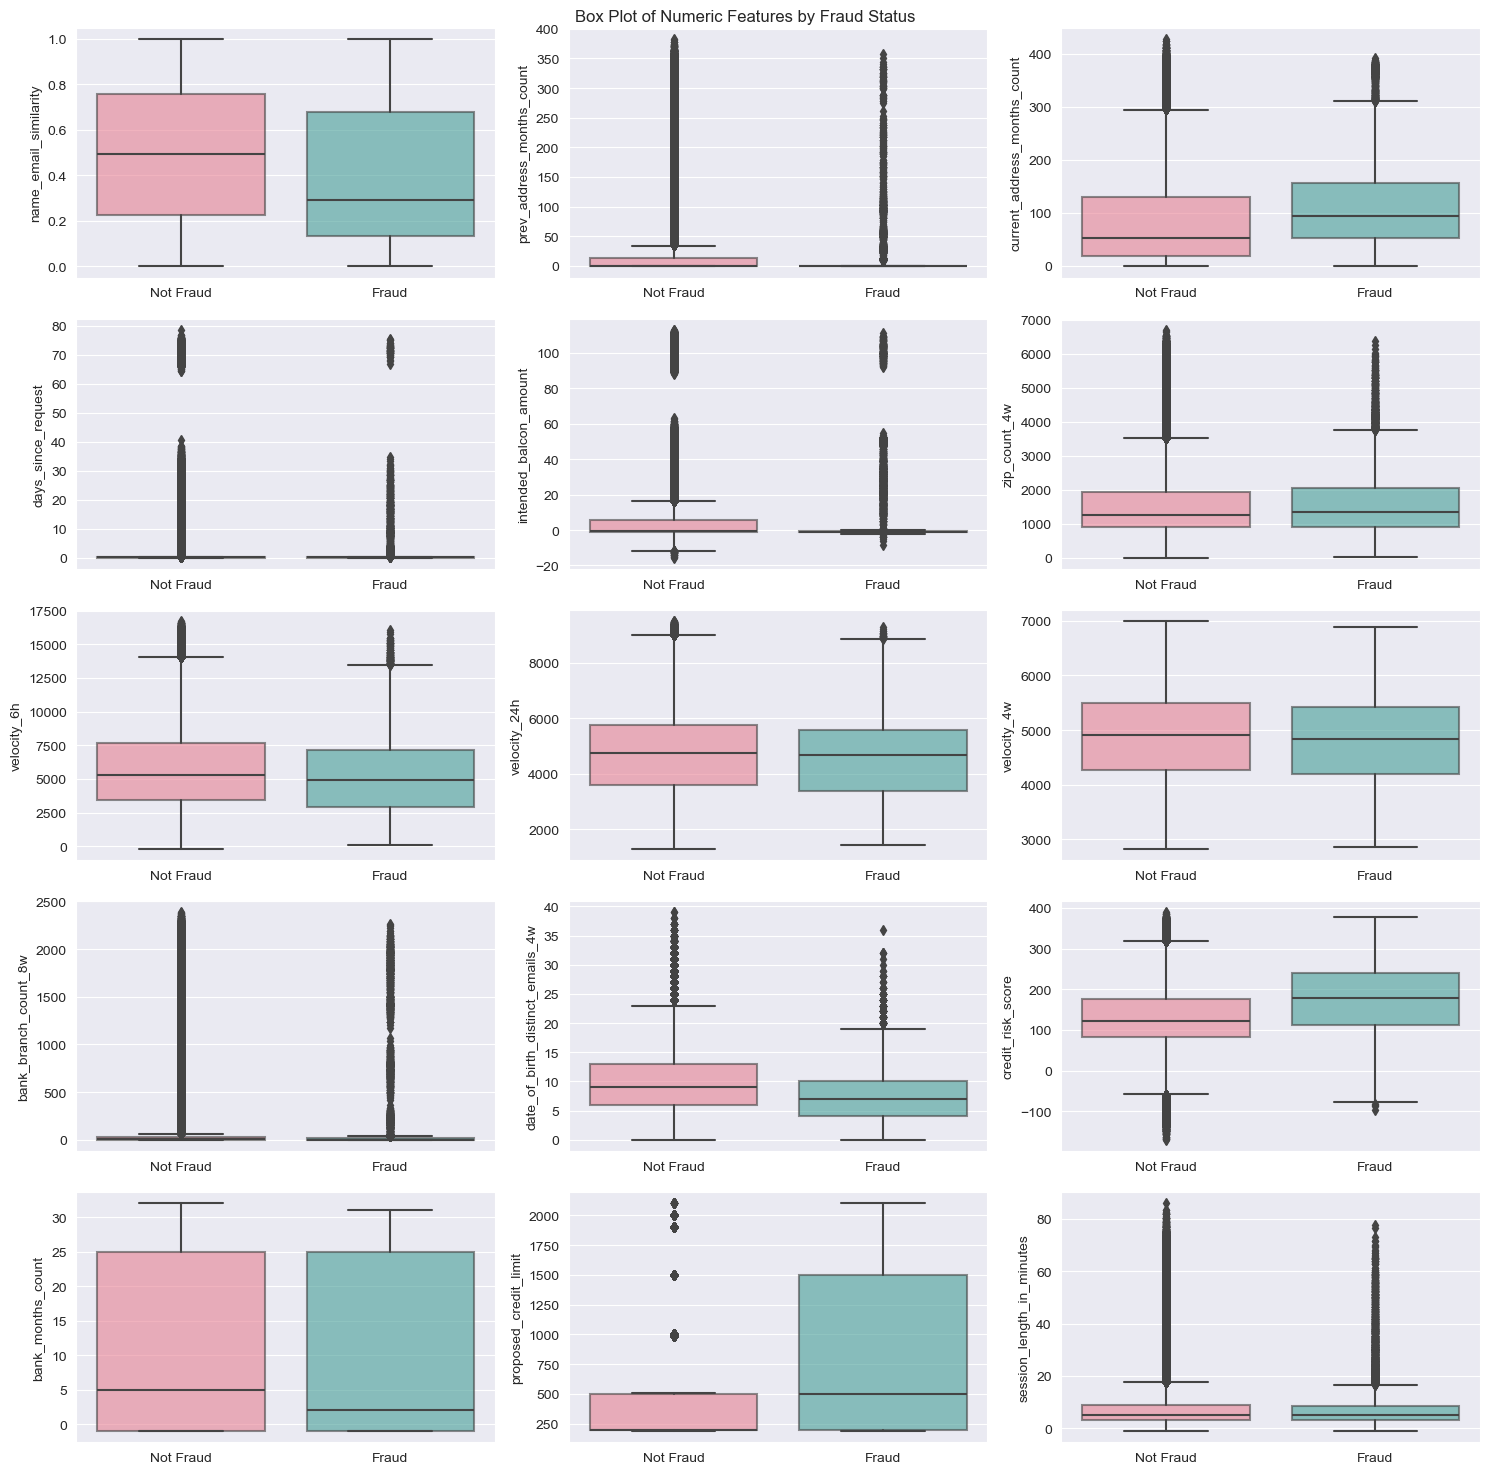

In [182]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Add a title to the figure
fig.suptitle('Box Plot of Numeric Features by Fraud Status')

# Loop through the numeric features and plot a box plot for each feature
for i, feature in enumerate(numeric_features_name):
    ax = axes[i // 3][i % 3]
    sns.boxplot(data=base, x='fraud_bool', y=feature, ax=ax, palette=my_palette, boxprops=dict(alpha=.6))
    ax.set_xlabel('')
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

### 1.3.3 Income,Credit Risk Score,Customer Age
- Income: 不同income组的欺诈数
- Credit Risk Score: 信用评分与欺诈的关系
- Customer Age: 不同年龄的欺诈率

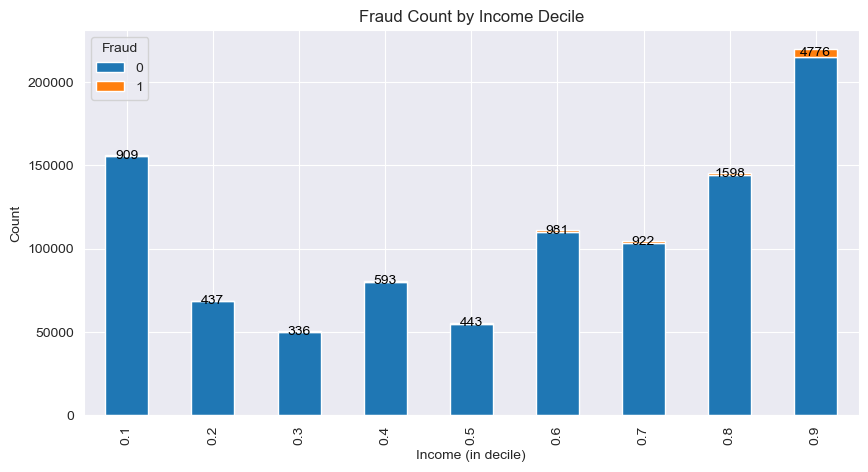

In [175]:
# Income with Fraud-bool

# 确保数据类型正确
df['income'] = df['income'].astype(str)
df['fraud_bool'] = df['fraud_bool'].astype(int)

# 分组统计每个income对应的fraud_bool计数
grouped = df.groupby(['income', 'fraud_bool']).size().unstack(fill_value=0)

# 绘制堆叠柱状图
fig, ax = plt.subplots(figsize=(10, 5))
grouped.plot(kind='bar', stacked=True, ax=ax)

# 美化图表
ax.set_title('Fraud Count by Income Decile')
ax.set_xlabel('Income (in decile)')
ax.set_ylabel('Count')
ax.legend(title='Fraud', loc='upper left')

# 在每个柱上标注出该income对应的欺诈数
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    # 检查是否为欺诈柱子
    if p.get_facecolor() == ax.get_legend().get_patches()[1].get_facecolor():
        if height > 0:  # 只标注高度大于0的柱子
            ax.text(x + width/2, y + height/2, int(height), ha='center', va='center', fontsize=10, color='black')

plt.show()

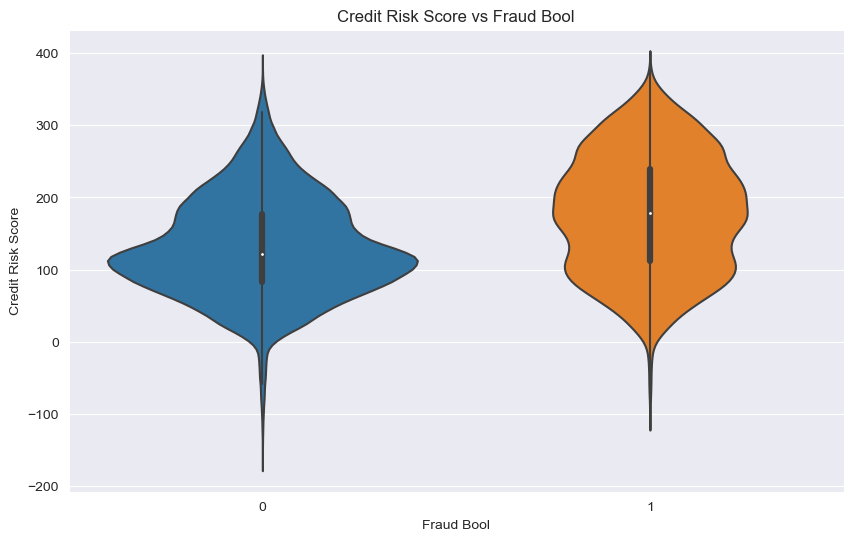

In [176]:
# 对credit_risk_score进行小提琴图可视化
plt.figure(figsize=(10, 6))
sns.violinplot(x='fraud_bool', y='credit_risk_score', data=df)
plt.title('Credit Risk Score vs Fraud Bool')
plt.xlabel('Fraud Bool')
plt.ylabel('Credit Risk Score')
plt.show()


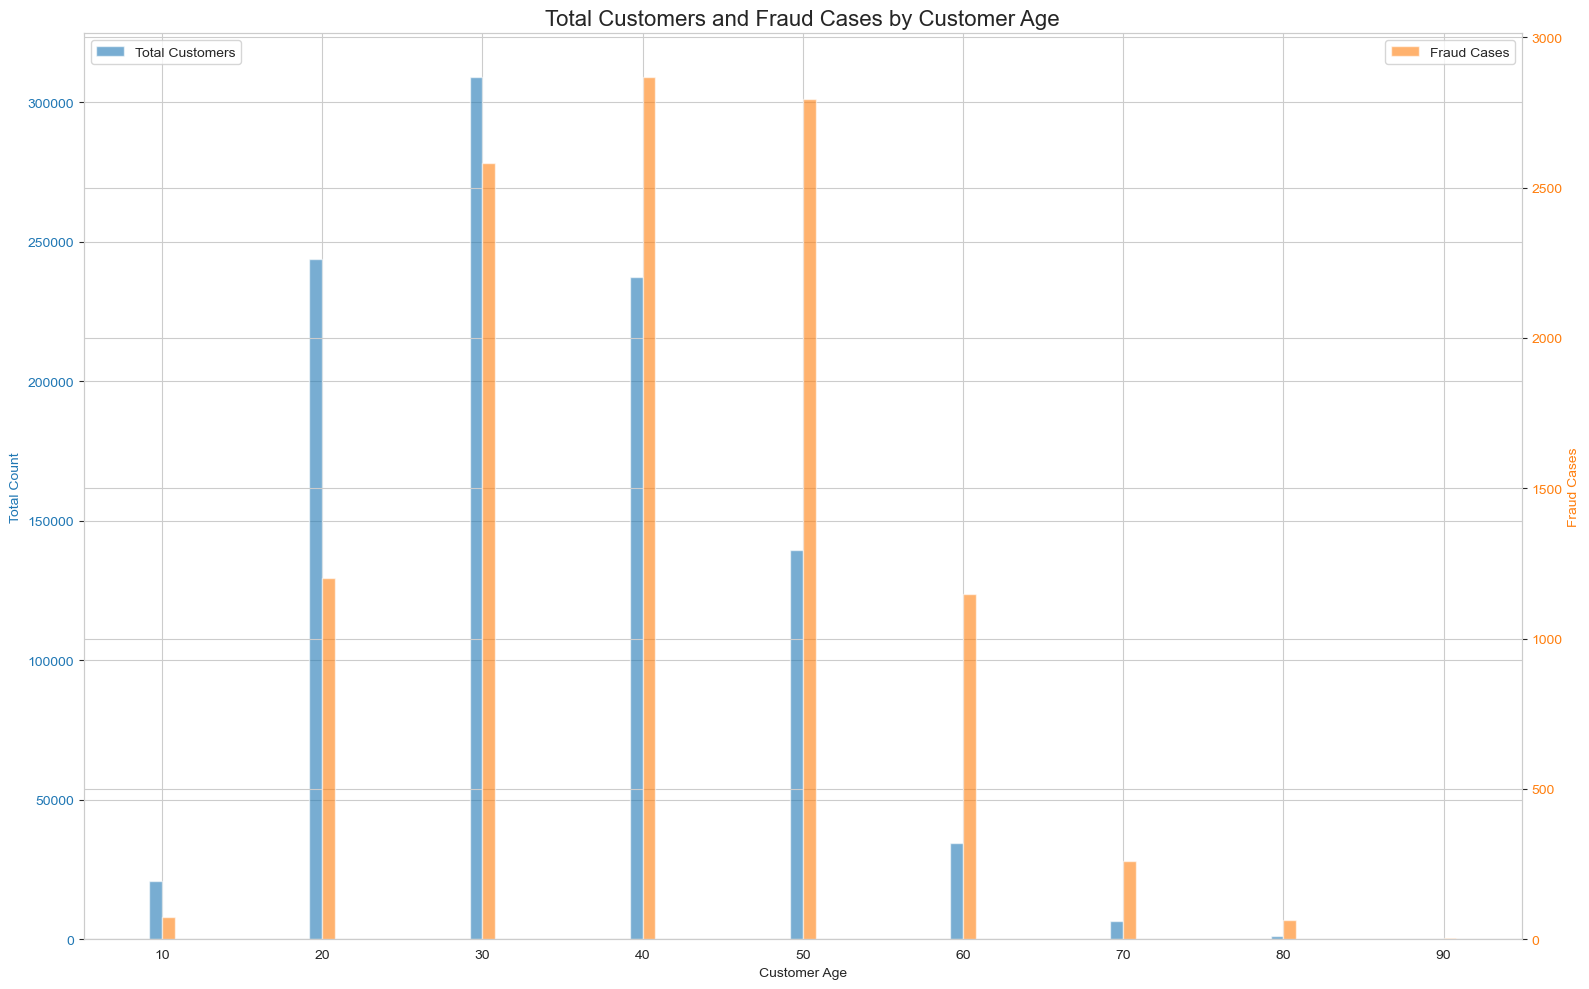

In [116]:
age_counts = df['customer_age'].value_counts().sort_index()
fraud_counts = df[df['fraud_bool'] == 1]['customer_age'].value_counts().sort_index()

# Ensure all ages in age_counts are in fraud_counts (and vice versa) by reindexing
fraud_counts = fraud_counts.reindex(age_counts.index, fill_value=0)

# Create the dual-axis bar plot with non-stacked bars and enhanced colors
fig, ax1 = plt.subplots(figsize=(16, 10))
bar_width = 0.8

# Bar plot for total number of customers by age with enhanced color
ax1.bar(age_counts.index - bar_width/2, age_counts.values, bar_width, color='#1f77b4', alpha=0.6, label='Total Customers')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Total Count', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Bar plot for number of fraud cases by age with enhanced color
ax2 = ax1.twinx()
ax2.bar(fraud_counts.index + bar_width/2, fraud_counts.values, bar_width, color='#ff7f0e', alpha=0.6, label='Fraud Cases')
ax2.set_ylabel('Fraud Cases', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Adding a title and legend with enhanced colors
plt.title('Total Customers and Fraud Cases by Customer Age', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


In [117]:
# 将fraud count和age count转换为dataframe
age_fraud = pd.DataFrame({'age': age_counts.index, 'total': age_counts.values, 'fraud': fraud_counts.values})
# 计算不同年龄的欺诈率
age_fraud['fraud_rate'] = age_fraud['fraud'] / age_fraud['total']

# age_fraud

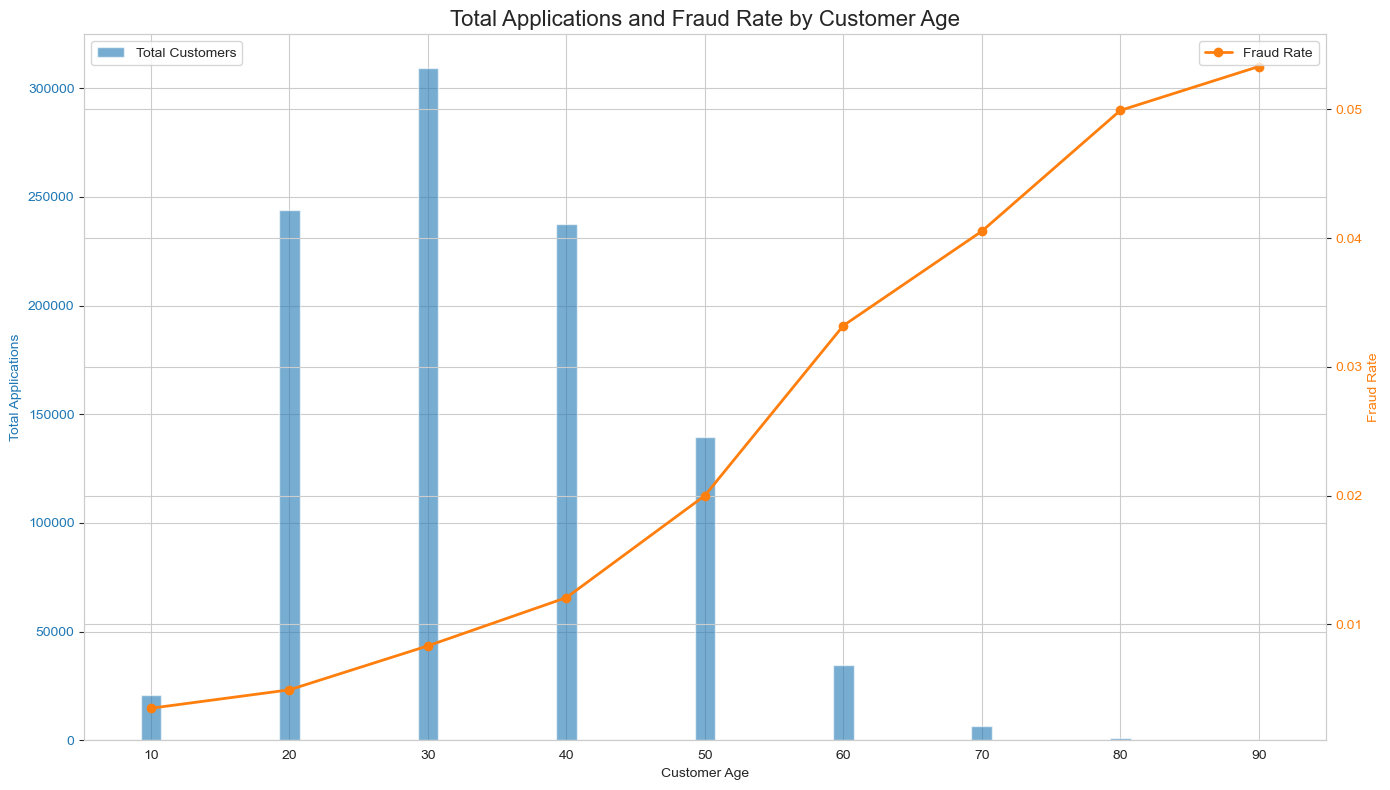

In [118]:
# Create a visualization showing the distribution of total customers and fraud rate by age

fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar width
bar_width = 1.5

# Bar plot for total number of customers by age
ax1.bar(age_fraud['age'], age_fraud['total'], bar_width, color='#1f77b4', alpha=0.6, label='Total Customers')
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Total Applications', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

# Line plot for fraud rate by age
ax2 = ax1.twinx()
ax2.plot(age_fraud['age'], age_fraud['fraud_rate'], color='#ff7f0e', marker='o', linewidth=2, label='Fraud Rate')
ax2.set_ylabel('Fraud Rate', color='#ff7f0e')
ax2.tick_params(axis='y', labelcolor='#ff7f0e')

# Adding a title and legend
plt.title('Total Applications and Fraud Rate by Customer Age', fontsize=16)
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()


#### insights
- income: 从堆叠柱状图可以看到，income在0.8和0.9时，欺诈数显著高于其余income值，其中income=0.9的申请人中有4000+的欺诈样本，占全部欺诈数的40%.
- credit_risk_score: 从小提琴图可以看到，非欺诈的数据分布更显著集中于credit_risk_score=100左右的部分，而欺诈样本则再200附近较为集中，且在更高的credit_risk_score值上有更多分布。
- customer_age: 从双轴柱状图可以看到，大部分申请人分布在20-40岁之间，欺诈样本则主要出现在age=30-59.根据数据集的prevalence特性，若按50岁为分界，即当age<=49为majority，其余为minority，则base数据集应该在minority中有大概两倍于majority的欺诈率。并且可以看到，随着age上升，fraud rate也在不断上升。

## 1.4 Categorical Features
`visualize_cate_feature`函数用于可视化类别特征的分布和欺诈率。会产生两个图，第一个图展示了类别特征的分布，第二个图展示了类别特征的欺诈率（该特征中每个类别的欺诈率）。


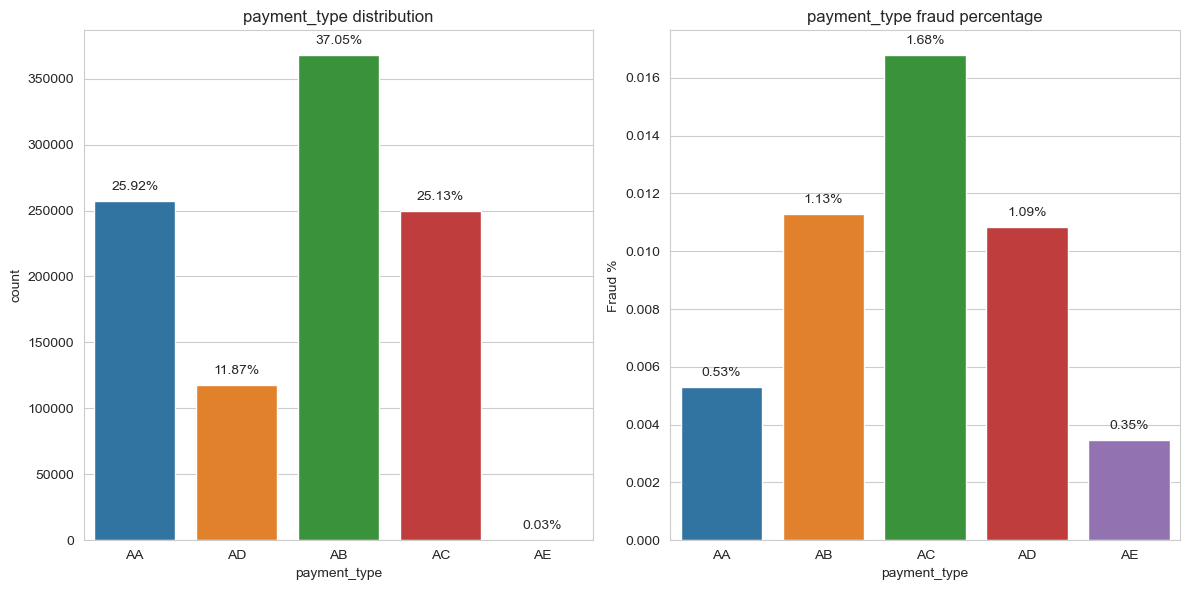

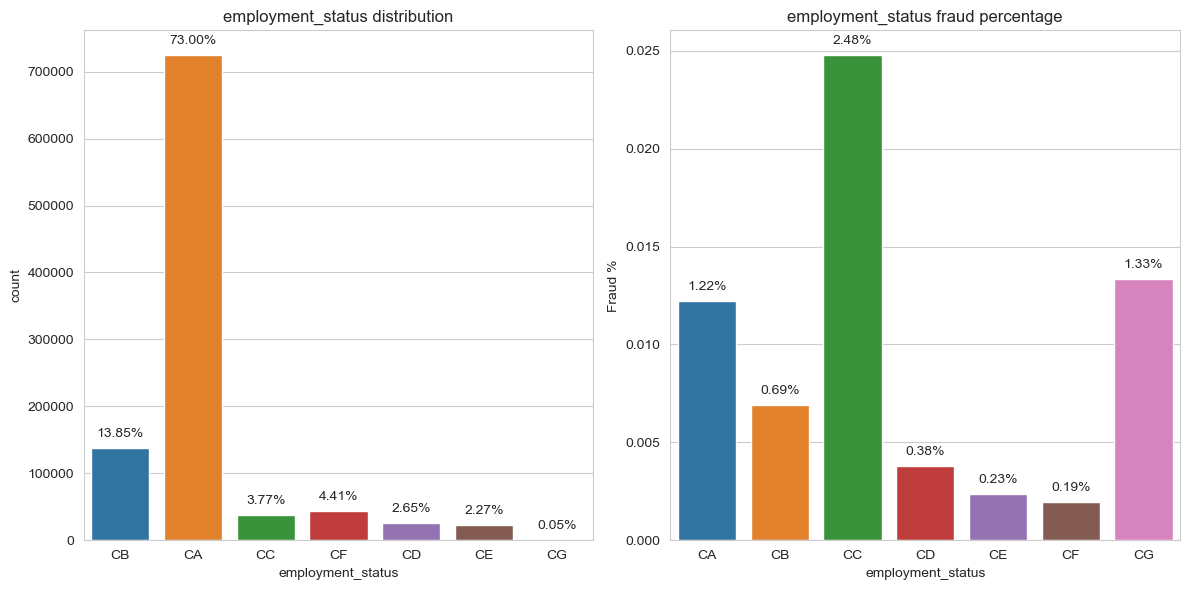

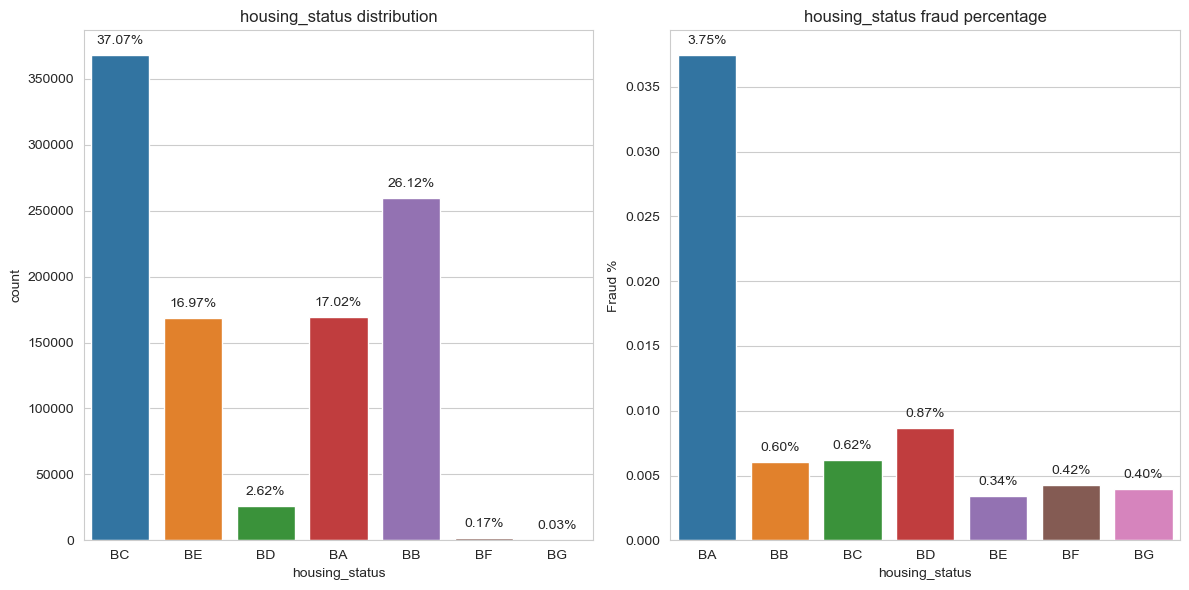

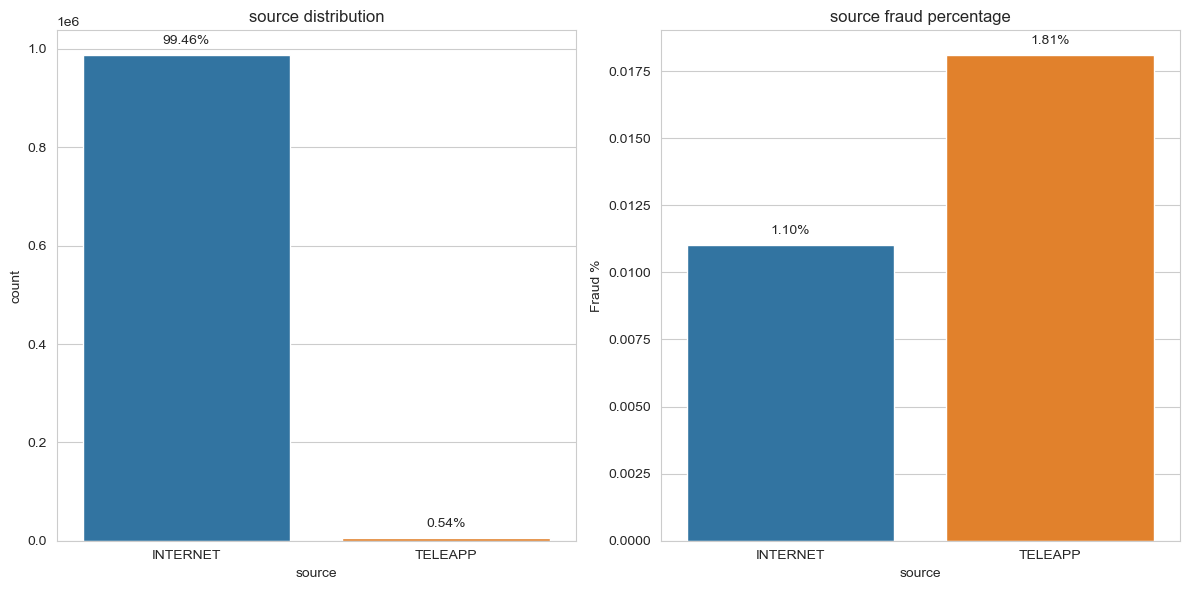

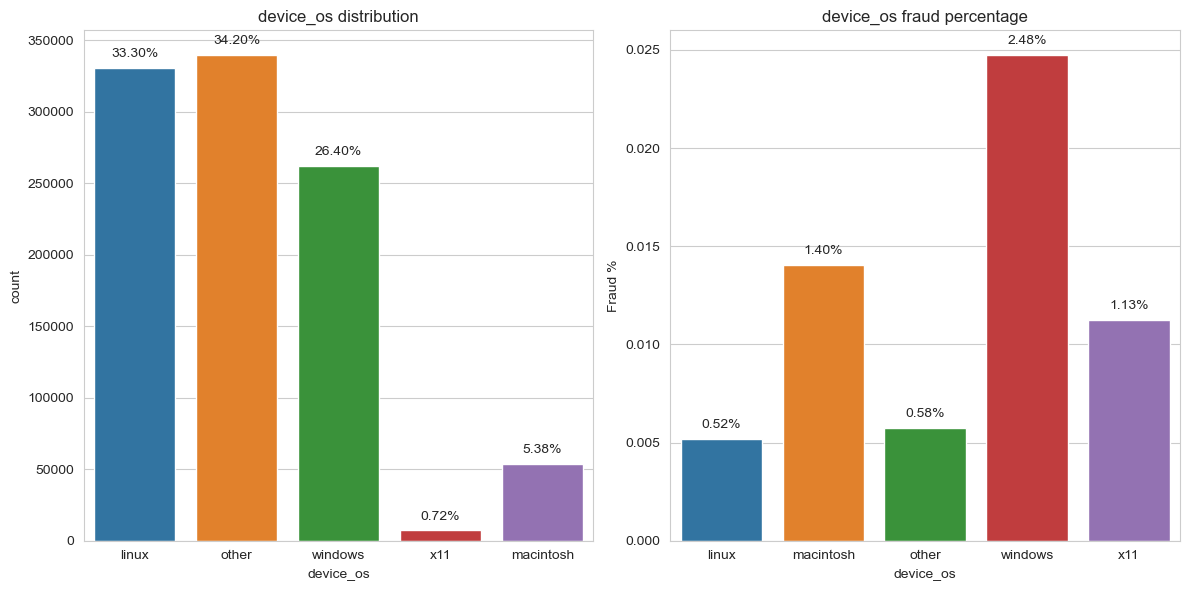

In [119]:
def visualize_cate_feature(data, *features):
    for feature in features:
        # Plot category distribution
        plt.figure(figsize=(12, 6))
        
        plt.subplot(1, 2, 1)
        ax1 = sns.countplot(data=data, x=feature)
        total = len(data)
        for p in ax1.patches:
            height = p.get_height()
            ax1.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.title(f'{feature} distribution')
        plt.ylabel('count')
        
        # Plot fraud percentage
        plt.subplot(1, 2, 2)
        fraud_data = data.groupby(feature)['fraud_bool'].mean().reset_index()
        ax2 = sns.barplot(data=fraud_data, x=feature, y='fraud_bool')
        for p in ax2.patches:
            height = p.get_height()
            ax2.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')
        plt.title(f'{feature} fraud percentage')
        plt.ylabel('Fraud %')
        
        plt.tight_layout()
        plt.show()

# Example usage with one feature
visualize_cate_feature(df, 'payment_type', 'employment_status', 'housing_status', 'source', 'device_os')


### Insights
当然可以，以下是对总结部分的进一步分析：

#### 1.支付类型（Payment Type）

- **AC类型：** 欺诈百分比最高（1.67%），而且该类型的交易占总交易的25.21%。这是一个值得关注的类别，因为它不仅欺诈率高，而且占比也相对较大。
- **AD和AB类型：** 欺诈百分比分别为1.08%和1.13%，略低于AC类型。这两个类别的交易量较少（分别为11.88%和37.06%），但仍然需要关注，特别是AB类型，因为其交易量很大。
- **AA类型：** 欺诈百分比为0.53%，低于其他主要类型，但交易量占比（25.82%）较高。因此，尽管欺诈率较低，仍需保持监控。
- **AE类型：** 欺诈百分比最低（0.35%），且交易量极少（0.03%）。这一类型目前似乎风险较小。

#### 2.来源（Source）

- **INTERNET来源：** 占比高达99.30%，欺诈百分比为1.10%。尽管欺诈率相对较低，但由于交易量巨大，需要持续监控。
- **TELEAPP来源：** 占比仅0.70%，但欺诈百分比为1.59%，高于INTERNET来源。尽管交易量小，但高欺诈率表明该来源有较高的风险，需要特别关注。

#### 3.住房状态（Housing Status）

- **BA状态：** 欺诈百分比最高（3.75%），但交易量占比仅为16.97%。这一类别的高欺诈率需要重点监控和防范。
- **BD状态：** 欺诈百分比为0.86%，占比仅2.62%，尽管交易量少，但欺诈风险仍需关注。
- **BC和BB状态：** 欺诈百分比分别为0.61%和0.60%，这两类交易量较大（分别为37.21%和26.10%），需持续监控。
- **BE, BF, BG状态：** 欺诈百分比相对较低（分别为0.34%, 0.42%, 0.40%），且交易量较少，风险较低，但仍需监控。

#### 4.操作系统（Device OS）

- **Windows操作系统：** 欺诈百分比最高（2.47%），占比26.35%。这一类别需要特别关注和防范。
- **Macintosh操作系统：** 欺诈百分比为1.40%，占比5.38%。尽管交易量较少，但欺诈率较高，需关注。
- **X11和Other操作系统：** 欺诈百分比分别为1.12%和0.58%，交易量分别为0.72%和34.27%。Other操作系统占比较大，尽管欺诈率不高，但仍需监控。
- **Linux操作系统：** 欺诈百分比最低（0.52%），但占比较大（33.27%），整体风险较低，但需保持监控。

#### 5.就业状态（Employment Status）

- **CC状态：** 欺诈百分比最高（2.47%），但交易量占比仅为3.78%。尽管交易量少，但高欺诈率表明风险较高。
- **CG状态：** 欺诈百分比为1.55%，占比0.05%。这一类别尽管交易量极少，但欺诈率较高，需关注。
- **CA状态：** 欺诈百分比为1.22%，占比最大（73.03%）。尽管欺诈率相对较低，但由于交易量巨大，需要持续监控。
- **CB状态：** 欺诈百分比为0.69%，占比13.83%。交易量较大，需持续监控。
- **CD, CE, CF状态：** 欺诈百分比分别为0.38%, 0.23%, 0.19%，交易量较少，风险较低，但仍需监控。

#### 总结

从以上分析可以得出以下几点：

1. **高风险类别需特别关注：** AC支付类型、TELEAPP来源、BA住房状态、Windows操作系统和CC就业状态是欺诈风险较高的类别。这些类别应成为防范欺诈的重点。

2. **大交易量类别需持续监控：** 尽管某些类别（如AA支付类型、INTERNET来源、BC住房状态、Linux操作系统和CA就业状态）欺诈率较低，但由于其交易量巨大，仍需持续监控以防范潜在风险。

3. **小交易量高欺诈率类别需额外关注：** 如TELEAPP来源和CG就业状态，尽管交易量小，但欺诈率高，表明其具有较高的风险，这些类别需要特别的关注和措施。



# 2. Feature Engineering
## 2.1 One-Hot Encoding for Categorical Features

- Label Encoding: 如果分类变量是有序的（如低、中、高），可以使用标签编码（Label Encoding），将每个类别映射到一个唯一的整数值。
- One-Hot Encoding: 对于无序的分类变量（如国家、城市、付款类型等），One-Hot Encoding 是常用的方法。它将每个类别转换为一个二进制列。
- 

### 2.1.1 Multi-collinearity多重共线性
多重共线性（Multicollinearity）是指在回归分析中，两个或多个自变量高度相关，从而导致回归系数的不稳定性和解释困难。具体表现为当自变量之间存在高度线性相关时，回归模型的参数估计可能变得非常不准确，标准误差变大，模型解释能力减弱。

多重共线性的原因和影响
原因：自变量之间的高度相关性。
在One-Hot Encoding过程中，如果所有类别都被编码成新的特征列（没有丢弃任何一个），这些列中有一些会线性相关。

影响：
- 回归系数变得不稳定，可能会因为样本的微小变化而发生很大改变。
- 标准误差变大，影响变量的显著性检验。
- 回归模型的解释性和预测能力下降。

One-Hot Encoding 和多重共线性
在 One-Hot Encoding 中，假设有一个包含 n 个不同类别的分类变量。对这个变量进行 One-Hot Encoding 会生成 n 个新的二进制特征列。如果保留所有这些特征列，会引入多重共线性的问题。因为这 n个特征列之和等于 1（每一行恰好属于其中一个类别）。

使用 get_dummies 函数时，可以通过设置 drop_first=True 来避免多重共线性问题。这样会删除第一个类别，从而避免引入不必要的特征并且保留了所有信息。

---
### 2.1.2. 多重共线性对模型的影响
一般而言，多重共线性会导致线性模型（如线性回归、逻辑回归等）的系数估计不准确，标准误差变大，模型的解释性和预测能力下降。

而对于树模型和神经网络模型，多重共线性的影响较小，因为这些模型不依赖于特征之间的线性关系。但是使用`drop_first=True`可以减少特征数量，提高模型训练效率。

In [9]:
def one_hot_encoding(data):
    # 需要进行One-Hot Encoding的分类变量
    categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    # 使用pd.get_dummies进行One-Hot Encoding
    # drop_first=True表示删除第一个类别，避免多重共线性,同时避免引入不必要的特征并且保留了所有信息
    # 此时先用False保留所有特征，后续建立模型时候可以选择drop_first=True来避免多重共线性并减少特征数量
    data_encoded = pd.get_dummies(data, columns=categorical_features,drop_first=False)
    
    # 找出新生成的 One-Hot 编码列
    encoded_columns = data_encoded.columns.difference(data.columns)
    
    # 将 One-Hot 编码列转换为整数类型
    data_encoded[encoded_columns] = data_encoded[encoded_columns].astype(int)
    
    return data_encoded

# 示例预处理
processed_data = one_hot_encoding(df)
processed_data.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,...,0,0,0,1,0,1,0,0,0,0
1,0,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,...,0,0,0,1,0,0,0,1,0,0
2,0,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,...,0,0,0,1,0,0,0,0,1,0
3,0,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,...,0,0,0,1,0,1,0,0,0,0
4,0,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,...,0,0,0,1,0,0,0,1,0,0


In [13]:
# labnel encoding
from sklearn.preprocessing import LabelEncoder

def label_encoding(data):
    # 需要进行Label Encoding的分类变量
    categorical_features = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']
    
    # 创建 LabelEncoder 实例
    label_encoder = LabelEncoder()
    
    # 对每个分类变量进行 Label Encoding
    for feature in categorical_features:
        data[feature] = label_encoder.fit_transform(data[feature])
    
    return data

processed_data = label_encoding(df)
processed_data.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,25.0,40,0.006735,0,1059,13096.035018,7850.955007,...,0,1500.0,0,0,16.224843,0,1,1.0,0,0
1,0,0.8,0.617426,89.0,20,0.010095,3,1658,9223.283431,5745.251481,...,0,1500.0,0,0,3.363854,2,1,1.0,0,0
2,0,0.8,0.996707,14.0,40,0.012316,1,1095,4471.472149,5471.988958,...,0,200.0,0,0,22.730559,3,0,1.0,0,0
3,0,0.6,0.475100,14.0,30,0.006991,1,3483,14431.993621,6755.344479,...,0,200.0,0,0,15.215816,0,1,1.0,0,0
4,0,0.9,0.842307,29.0,40,5.742626,0,2339,7601.511579,5124.046930,...,0,200.0,0,0,3.743048,2,0,1.0,0,0


## 2.2 Train Test Split & Feature Scaling---MinMaxScaler

只对连续型（numeric）特征进行缩放，因为二进制特征和类别型特征不需要缩放。

In [14]:
# train test split
X = processed_data.drop(columns='fraud_bool')
y = processed_data['fraud_bool']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [15]:
# 创建 MinMaxScaler 实例
numeric_transformer = MinMaxScaler()

# 创建 ColumnTransformer
preprocessor = ColumnTransformer([('scaled', numeric_transformer, numeric_features_name)], remainder='passthrough')

# 在训练集上拟合并转换
x_train_scaled = preprocessor.fit_transform(x_train)

# 仅转换测试集
x_test_scaled = preprocessor.transform(x_test)

# 获取列的顺序(colmuntransformer会改变列的顺序)
new_columns = numeric_features_name + [col for col in x_train.columns if col not in numeric_features_name]

# 转换后的结果通常为 NumPy 数组，将其转换回 DataFrame 并保持列名一致性
x_train_scaled = pd.DataFrame(x_train_scaled, columns=new_columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=new_columns)

## 2.3 Feature Selection
初步特征选择（剔除冗余或无用特征）---> 重采样 ---> 进一步特征选择


#### 2.3.1 Variance Threshold Test for Constant Features
方差阈值测试是一种简单的特征选择方法，用于识别具有低方差的特征。这些特征对于模型的预测能力没有太大帮助，因此可以考虑删除这些特征。
为了保证信息不丢失，这里只选择剔除方差为0的特征，即常量特征（constant features）。

使用方差选择器后，发现"device_fraud_count"特征的方差为0，即该特征在训练集中的所有值都相同，因此可以将其删除。

In [17]:
from sklearn.feature_selection import VarianceThreshold

# 创建 VarianceThreshold 实例
selector = VarianceThreshold(threshold=0)
# 在训练集上拟合并转换
x_train_selected = selector.fit_transform(x_train_scaled)
# 仅转换测试集
x_test_selected = selector.transform(x_test_scaled)

# 打印丢弃的特征
dropped_features = x_train_scaled.columns[~selector.get_support()]
print(f'Dropped features: {dropped_features}')

Dropped features: Index(['device_fraud_count'], dtype='object')


In [18]:
# drop the constant features
x_train_scaled.drop(columns=dropped_features, inplace=True)
x_test_scaled.drop(columns=dropped_features, inplace=True)

#### 2.3.2 Resample the Data
由于数据集存在严重的不平衡，需要对数据进行重采样，以便模型更好地学习少数类别的特征。（只对训练集重采样以及进行特征选择操作）

重采样后再进行进一步的特征选择，有下面优点：
- 保持数据分布的一致性：在处理类别不平衡的数据集时，特征选择可能会受到多数类的支配。重采样之后，数据变得更平衡，特征选择的结果更能反映平衡数据集的实际情况。
- 增强少数类特征的重要性：重采样（如 SMOTE）可以生成少数类的合成样本，使少数类的特征在特征选择中不被忽略。这有助于识别出对少数类分类有帮助的特征。
- 避免偏差：在类别不平衡的数据集中，特征选择算法可能会倾向于选择对多数类更重要的特征。重采样之后，特征选择算法能够更公平地评估每个特征的重要性。

为了保证特征选择和模型建立时候的一致性，保证两个阶段都是用同一种重采样算法。这里使用smotenc（SMOTE算法的变体，适用于分类变量）对训练集进行重采样。

重采样前后训练集shape：
- 重采样前：(794885, 49)，欺诈：非欺诈 = 8803:786082
- 重采样后：(1572164, 49)，欺诈：非欺诈 = 786082:786082

In [13]:
# 确定分类特征的名称
categorical_features_name = [col for col in x_train_scaled.columns if 2 <= x_train_scaled[col].nunique() < 10]

# 确定分类特征的索引
all_features = list(x_train_scaled.columns)  # 所有特征的名称列表
categorical_feature_indices = [i for i, feature in enumerate(all_features) if feature in categorical_features_name]

print("分类特征名称：", categorical_features_name)
print("分类特征索引：", categorical_feature_indices)

分类特征名称： ['income', 'customer_age', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'month', 'payment_type_AA', 'payment_type_AB', 'payment_type_AC', 'payment_type_AD', 'payment_type_AE', 'employment_status_CA', 'employment_status_CB', 'employment_status_CC', 'employment_status_CD', 'employment_status_CE', 'employment_status_CF', 'employment_status_CG', 'housing_status_BA', 'housing_status_BB', 'housing_status_BC', 'housing_status_BD', 'housing_status_BE', 'housing_status_BF', 'housing_status_BG', 'source_INTERNET', 'source_TELEAPP', 'device_os_linux', 'device_os_macintosh', 'device_os_other', 'device_os_windows', 'device_os_x11']
分类特征索引： [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


In [20]:
# 创建 SMOTENC 实例
smote = SMOTENC(categorical_features=categorical_feature_indices, random_state=42,n_jobs=-1)

# 在训练集上拟合并转换
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# 将重采样后的数据转换为 DataFrame
x_train_resampled = pd.DataFrame(x_train_resampled, columns=x_train_scaled.columns)

# 查看重采样后的数据分布
y_train_resampled.value_counts()

# 执行时间：
# one hot: 3min50s（n_jobs=-1）
# label encoding: 1min37s（n_jobs=-1）

E:\Programming\anaconda3\envs\mytorch\lib\site-packages\imblearn\over_sampling\_smote\base.py:638: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


fraud_bool
0    786082
1    786082
Name: count, dtype: int64

In [33]:
# 储存重采样后的数据
# 合并x_train_resampled和y_train_resampled
# 重置索引
# x_train_resampled.reset_index(drop=True, inplace=True)
# y_train_resampled.reset_index(drop=True, inplace=True)
# train_resampled = pd.concat([x_train_resampled, y_train_resampled], axis=1)
# # 
# # # 合并x_test_scaled和y_test
# # # 重置索引、
# x_test_scaled.reset_index(drop=True, inplace=True)
# y_test.reset_index(drop=True, inplace=True)
# # 
# test_scaled = pd.concat([x_test_scaled, y_test], axis=1)

# 保存处理后的数据
# train_resampled.to_csv('./datasets/base_train_resampled.csv', index=False)
# test_scaled.to_csv('./datasets/base_test_scaled.csv', index=False)

# 保存重采样前的数据
# 重置索引
# x_train_scaled.reset_index(drop=True, inplace=True)
# y_train.reset_index(drop=True, inplace=True)
# # 将y_train转换为DataFrame
# y_train = pd.DataFrame(y_train, columns=['fraud_bool'])
# train_scaled = pd.concat([x_train_scaled, y_train], axis=1)
# train_scaled.to_csv('./datasets/base_train_scaled.csv', index=False)

### 2.3.3 Pearson Correlation Test for Multicollinearity


E:\Programming\anaconda3\envs\mytorch\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


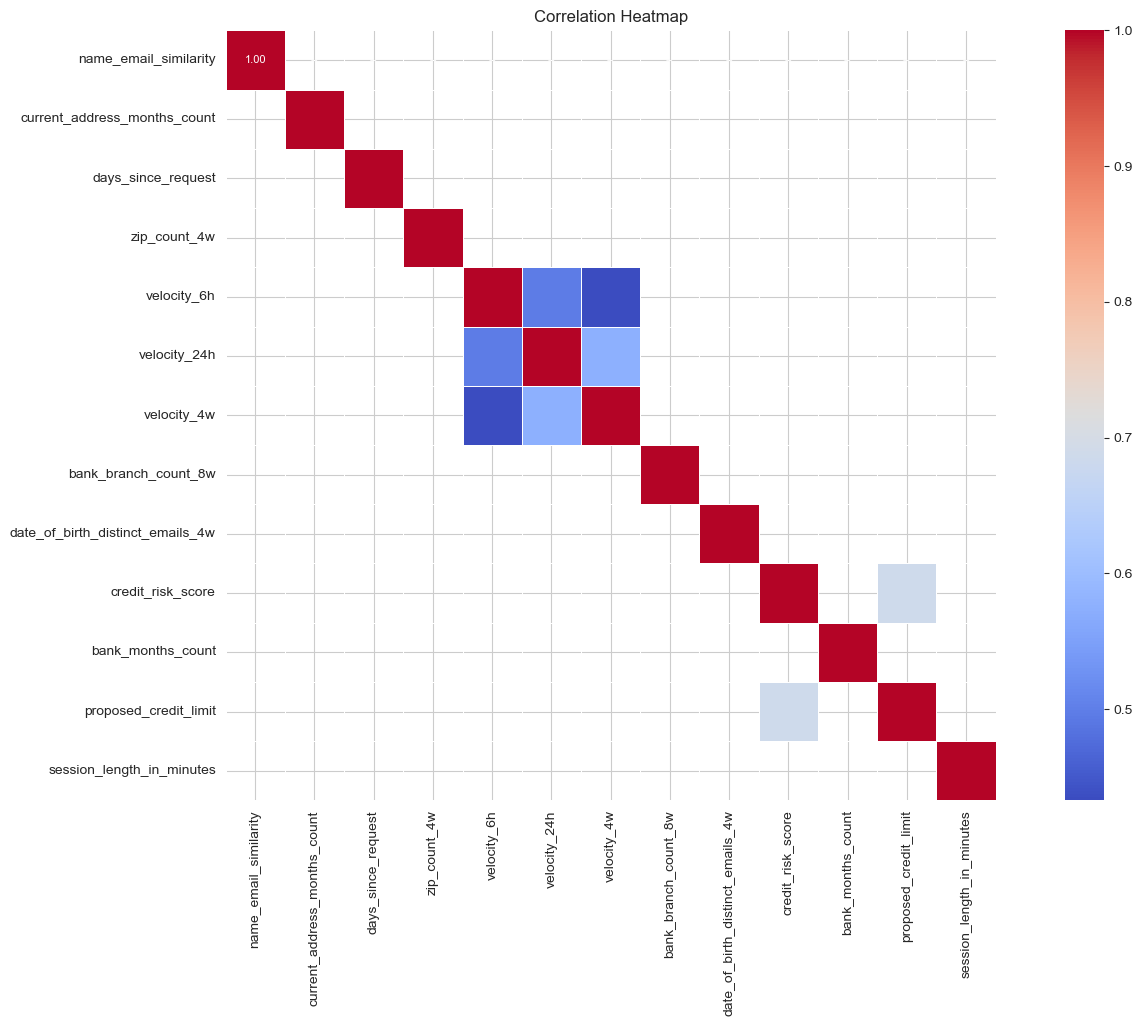

In [198]:
# 计算特征之间的相关性
correlation_matrix = x_train_resampled[numeric_features_name].corr()

# Plot correlation matrix with annotated values
fig, ax = plt.subplots(figsize=(18, 10))
sns.heatmap(correlation_matrix[(correlation_matrix >= 0.4) | (correlation_matrix <= -0.4)], annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, square=True, ax=ax, annot_kws={"fontsize": 8})
plt.title('Correlation Heatmap')
plt.show()

##### 相关性分析

- velocity_24h 和 velocity_4w 之间的相关性为 0.58。这表明在过去24小时内的交易速度和过去4周内的交易速度之间有一定的相关性。
- credit_risk_score 和 proposed_credit_limit 之间的相关性为 0.69。这意味着信用风险评分和提议的信用额度之间有较强的正相关性。

### 2.3.4 Chi-Squared Test for Categorical Features

卡方检验（Chi-square test）是专门用于评估两个分类变量之间独立性的一种统计方法。在特征选择的背景下，卡方检验可以用来衡量每个分类特征与目标变量（通常是二分类变量）之间的关联强度，从而帮助选择出最重要的分类特征。

在卡方检验中，p值用于评估特征与目标变量之间的独立性。具体步骤如下：

- 零假设（H0）：特征与目标变量独立，没有关系。
- 备择假设（H1）：特征与目标变量不独立，有关系。

p<0.05：拒绝零假设，特征与目标变量之间存在关系。说明该特征对于预测目标变量是重要的。

In [220]:
x_train_cat = x_train_resampled[categorical_features_name].copy()
y_train_cat = y_train_resampled.copy()

chi2_results = chi2(x_train_cat, y_train_cat)

# 创建特征及其对应卡方值的 DataFrame
chi2_scores_df = pd.DataFrame({'Feature': x_train_cat.columns, 'Score': chi2_results[0], 'P-value': chi2_results[1]})
chi2_scores_df_sorted = chi2_scores_df.sort_values(by='Score', ascending=False)

chi2_scores_df_sorted

,Feature,Score,P-value
1,customer_age,496441.898751,0.000000e+00
22,housing_status_BA,234705.030951,0.000000e+00
5,has_other_cards,158491.178707,0.000000e+00
34,device_os_windows,157865.414699,0.000000e+00
3,phone_home_valid,143848.631447,0.000000e+00
31,device_os_linux,121225.763447,0.000000e+00
10,payment_type_AA,108553.272143,0.000000e+00
26,housing_status_BE,106866.317605,0.000000e+00
7,keep_alive_session,102761.349994,0.000000e+00
33,device_os_other,96313.508711,0.000000e+00


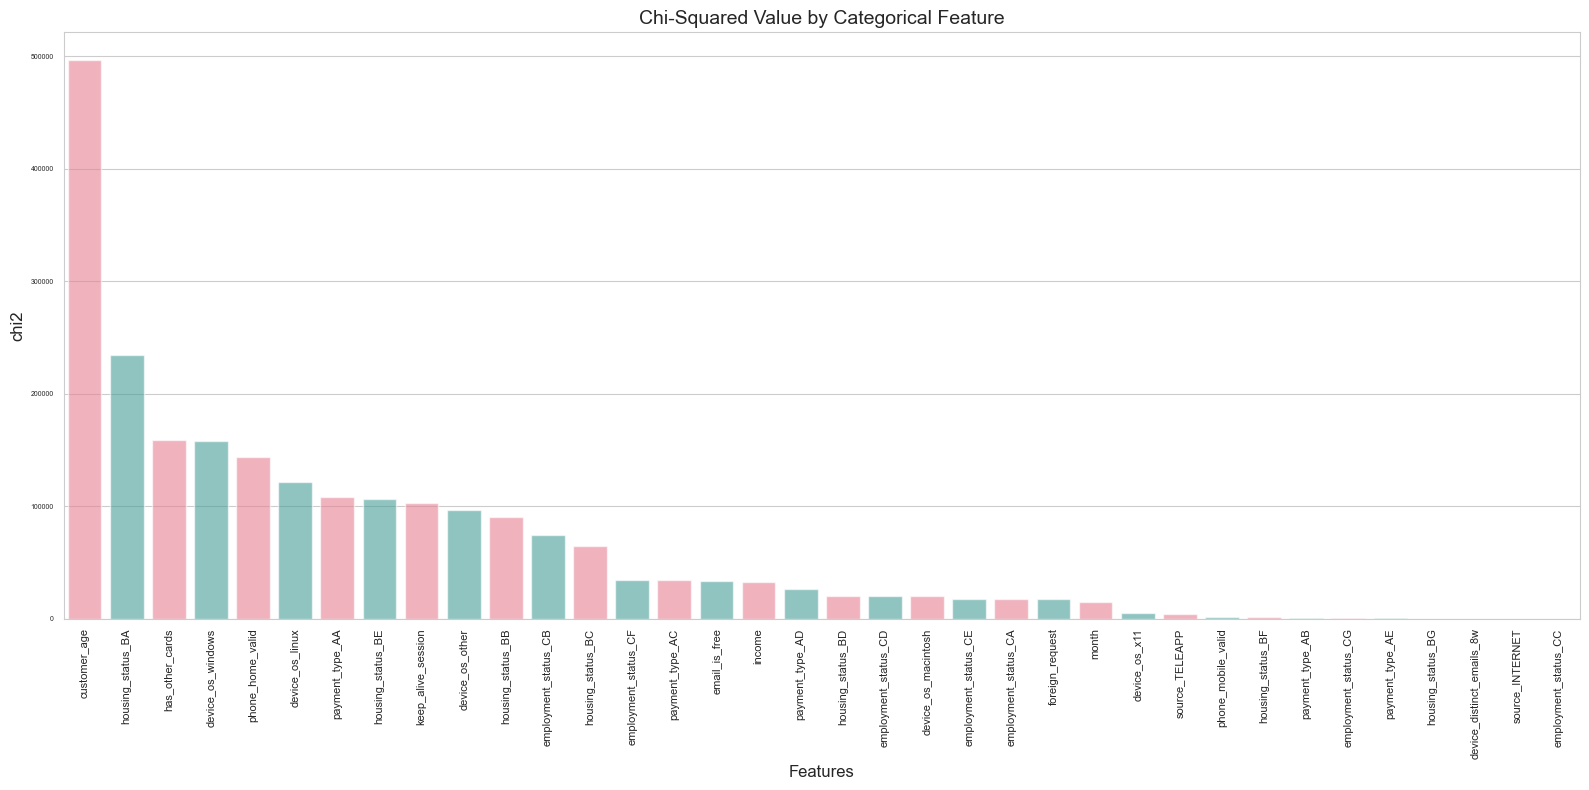

In [222]:
# Set up plot
plt.figure(figsize=(16, 8))

# Create bar plot
sns.barplot(data=chi2_scores_df_sorted.sort_values(by='Score', ascending=False), x="Feature", y="Score", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Categorical Feature", fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

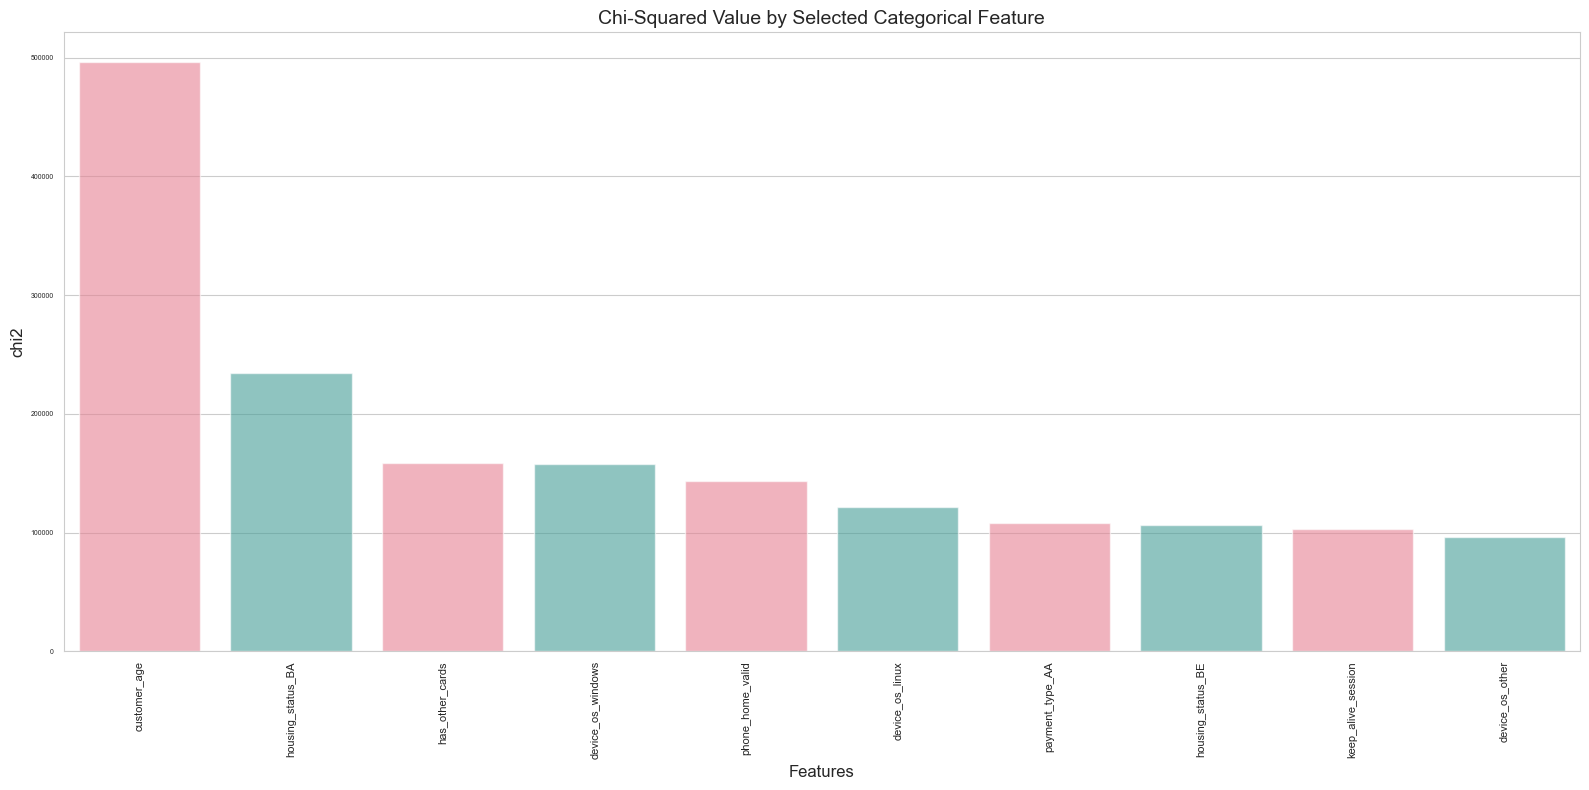

In [241]:
# 选取前10个特征
selected_feature_names_chi2 = chi2_scores_df_sorted['Feature'].head(10).tolist()
# 绘制所选特征的卡方值
chi2_scores_df_selected = chi2_scores_df_sorted[chi2_scores_df_sorted['Feature'].isin(selected_feature_names_chi2)]

# Set up plot
plt.figure(figsize=(16, 8))
sns.barplot(data=chi2_scores_df_selected, x="Feature", y="Score", palette=my_palette, alpha=.6)
plt.xlabel("Features", fontsize=12)
plt.ylabel("chi2", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Chi-Squared Value by Selected Categorical Feature", fontsize=14)
plt.tight_layout()
plt.show()

### 2.3.5 Mutual Information Test for Numeric Features

互信息（Mutual Information，简称 MI）是一个度量随机变量之间相互依赖程度的统计量。具体来说，互信息量化了两个随机变量之间共享的信息量，用于评估它们之间的非线性关系。互信息高的特征表明该特征对目标变量有较强的预测能力。

若某个feature互信息值较高，表明它与目标变量之间共享的信息量较大，因此对目标变量有较强的预测能力。

In [224]:
# 选取数值特征
x_train_numeric = x_train_resampled[numeric_features_name].copy()
y_train_numeric = y_train_resampled.copy()

# 使用 mutual_info_classif 选择最佳特征
mutual_info_results = mutual_info_classif(x_train_numeric, y_train_numeric, random_state=42)

# 创建特征及其对应互信息值的 DataFrame
mutual_info_scores_df = pd.DataFrame({'Feature': x_train_numeric.columns, 'Score': mutual_info_results})
mutual_info_scores_df_sorted = mutual_info_scores_df.sort_values(by='Score', ascending=False)

mutual_info_scores_df_sorted

,Feature,Score
9,credit_risk_score,0.646692
1,current_address_months_count,0.643268
3,zip_count_4w,0.631914
8,date_of_birth_distinct_emails_4w,0.516614
7,bank_branch_count_8w,0.480656
10,bank_months_count,0.243945
11,proposed_credit_limit,0.155527
2,days_since_request,0.042619
0,name_email_similarity,0.035408
6,velocity_4w,0.027790


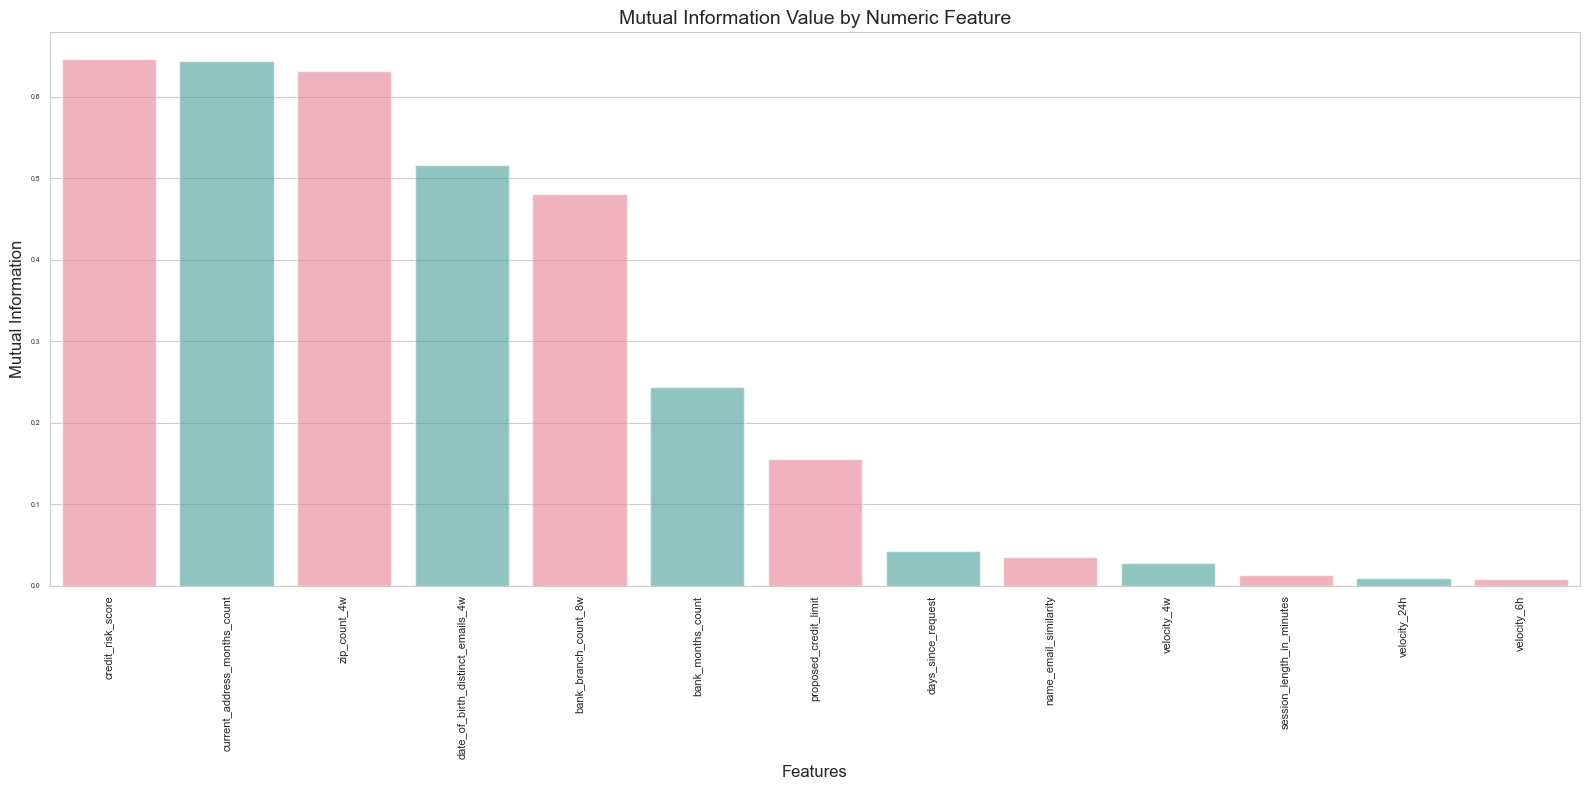

In [225]:
# 绘制互信息值barplot
plt.figure(figsize=(16, 8))
sns.barplot(data=mutual_info_scores_df_sorted, x="Feature", y="Score", palette=my_palette, alpha=.6)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Mutual Information", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=5)
plt.title("Mutual Information Value by Numeric Feature", fontsize=14)
plt.tight_layout()
plt.show()

In [242]:
# 选取前5个特征
selected_feature_names_mi = mutual_info_scores_df_sorted['Feature'].head(5).tolist()
selected_feature_names_mi

['credit_risk_score',
 'current_address_months_count',
 'zip_count_4w',
 'date_of_birth_distinct_emails_4w',
 'bank_branch_count_8w']

### 2.3.6 RFE with Extra Trees
RFE(Recursive Feature Elimination)是一种递归特征消除算法，用于选择最佳特征子集。RFE通过递归地训练模型并消除最不重要的特征，直到达到所需的特征数量。RFE需要选取一个基模型（需要能提供特征重要性评估的模型），大部分模型都可以作为RFE的基模型（如线性回归，树类模型）。

In [245]:
# 创建 ExtraTreesClassifier 实例
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 创建 RFE 实例
rfe = RFE(extra_trees, n_features_to_select=30)
rfe.fit(x_train_resampled, y_train_resampled)

# 获取选中的特征
selected_features_rfe = x_train_resampled.columns[rfe.support_]
print(f"Selected features: {selected_features_rfe}")

## execute time: 26min47s
# Selected features: Index(['name_email_similarity', 'current_address_months_count', 'zip_count_4w',
#        'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
#        'date_of_birth_distinct_emails_4w', 'credit_risk_score',
#        'bank_months_count', 'proposed_credit_limit',
#        'session_length_in_minutes', 'income', 'customer_age', 'email_is_free',
#        'phone_home_valid', 'has_other_cards', 'keep_alive_session', 'month',
#        'payment_type_AA', 'payment_type_AC', 'employment_status_CA',
#        'employment_status_CB', 'housing_status_BA', 'housing_status_BB',
#        'housing_status_BC', 'housing_status_BE', 'device_os_linux',
#        'device_os_other', 'device_os_windows']

Selected features: Index(['name_email_similarity', 'current_address_months_count', 'zip_count_4w',
       'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'bank_months_count', 'proposed_credit_limit',
       'session_length_in_minutes', 'income', 'customer_age', 'email_is_free',
       'phone_home_valid', 'has_other_cards', 'keep_alive_session', 'month',
       'payment_type_AA', 'payment_type_AC', 'employment_status_CA',
       'employment_status_CB', 'housing_status_BA', 'housing_status_BB',
       'housing_status_BC', 'housing_status_BE', 'device_os_linux',
       'device_os_other', 'device_os_windows'],
      dtype='object')
